In [1]:
import gym

In [2]:
env = gym.make('CartPole-v0')

In [3]:
env.reset()

array([-0.01757603,  0.00081057,  0.00912749,  0.04537839])

In [4]:
box = env.observation_space

In [6]:
box

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [5]:
env.action_space

Discrete(2)

In [21]:
from __future__ import print_function, division
from builtins import range

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The following function predicts the action using the following logic.
# If state.dot(weights) > 0 -> do action 1, If state.dot(weights) < 0 -> do action 0
def get_action(s,w):
    return 1 if s.dot(w) > 0 else 0

In [6]:
# The following function implements an episode and the function returns the episode length.
def play_one_episode(env, weights):
    obs = env.reset()
    done = False
    t = 0
    
    while not done and t < 10000:
        t += 1
        action = get_action(obs, weights)
        obs, reward, done, info = env.step(action)
        if done:
            break
    return t

In [3]:
# The following function implements multiple episodes using a given weight parameter and it
# returns the average length of episodes which was generated using the same weights.
def play_multiple_episodes(env,T,weights):
    episode_lengths = np.empty(T)
    
    for k in range(T):
        episode_lengths[k] = play_one_episode(env,weights)
    avg_length = episode_lengths.mean()
    print("Best Average length:", avg_length)
    return avg_length
    
    

In [4]:
# The following function implements the random search on the CartPole environment.
# The function takes in a virtual environment and returns episode lengths corresponding to
# the random weights,best mean length(episodes) and the best weights.
def random_search(env):
    episode_lengths = []
    best = 0
    weights = None
    
    for k in range(100):
        new_weights = np.random.random(4) * 2 -1
        avg_length = play_multiple_episodes(env, 100, new_weights)
        episode_lengths.append(avg_length)
        
        if avg_length > best:
            weights = new_weights
            best = avg_length
    return episode_lengths, best, weights

Best Average length: 50.51
Best Average length: 23.97
Best Average length: 9.62
Best Average length: 100.06
Best Average length: 60.77
Best Average length: 9.72
Best Average length: 9.12
Best Average length: 9.23
Best Average length: 8.88
Best Average length: 49.81
Best Average length: 9.1
Best Average length: 9.23
Best Average length: 46.11
Best Average length: 78.39
Best Average length: 9.04
Best Average length: 62.88
Best Average length: 9.61
Best Average length: 48.54
Best Average length: 26.68
Best Average length: 9.5
Best Average length: 18.16
Best Average length: 9.33
Best Average length: 224.35
Best Average length: 127.04
Best Average length: 9.65
Best Average length: 11.25
Best Average length: 9.72
Best Average length: 9.08
Best Average length: 81.18
Best Average length: 26.16
Best Average length: 390.9
Best Average length: 9.59
Best Average length: 9.67
Best Average length: 37.29
Best Average length: 9.49
Best Average length: 29.44
Best Average length: 9.83
Best Average lengt

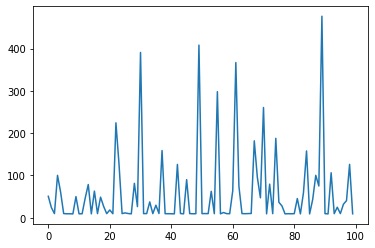

###Running Random Search###
Best Average length: 477.22


In [9]:
if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    episode_lengths,best_avg_length, weights = random_search(env)
    print(best_avg_length)
    print(weights)
    plt.plot(episode_lengths)
    plt.show()
    print("###Running Random Search###")
    play_multiple_episodes(env,100,weights)
        

In [34]:
play_one_episode(env, weights)

200